In [1]:
#installing tensorflow

#bellow command were executed on wsl terminal

#conda install -c conda-forge cudatoolkit=11.8.0
#python3 -m pip install nvidia-cudnn-cu11==8.6.0.163
#pip install --upgrade pip
#python3 -m pip install tensorflow==2.12.*

In [2]:
#installing packages
!python3 -m pip install -q -U watermark
!python3 -m pip install -U pip
!python3 -m pip install -U matplotlib
!python3 -m pip install scikit-learn
!python3 -m pip install pandas


/bin/bash: /home/bruno/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/bruno/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
/bin/bash: /home/bruno/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 40.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 46.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 42.9 MB/s eta 0:00:00a 0:00:01


In [1]:
#Imports

#Data visualization and manipulation
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Image handling
import os
import sklearn
from PIL import Image
from sklearn.model_selection import train_test_split

#Utility and calculation
import itertools
from sklearn.utils.multiclass import unique_labels
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

#Deep learning
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Dropout, Activation
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.utils import to_categorical
from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input

#Disabling Pandas and Matplotslib warnings
#import sys
#import warnings
#import matplotlib.cbook
#if not sys.warnoptions:
#    warnings.simplefilter("ignore")
#warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore", category=matplotlib.cbook.MatplotlibDeprecationWarning)

#%matplotlib inline


2024-05-29 20:19:26.333210: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 20:19:27.187825: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

#Package versions in this Jupyter notebook
%reload_ext watermark
%watermark -a "Bruno Castro - MBA USP ESALQ" --iversions

Author: Bruno Castro - MBA USP ESALQ

sklearn   : 1.4.2
keras     : 2.12.0
numpy     : 1.24.3
matplotlib: 3.8.4
PIL       : 10.3.0
tensorflow: 2.12.1
pandas    : 2.2.2



In [4]:
#List hardware available
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9482773137454448973
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5826936832
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2741140444653910690
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2024-05-26 17:45:44.143879: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-26 17:45:44.267876: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-26 17:45:44.267945: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-26 17:45:44.398784: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-26 17:45:44.398879: I tensorflow/compile

In [3]:
import tensorflow as tf
print("Number of available GPUs: ", len(tf.config.experimental.list_physical_devices('GPU')))

Number of available GPUs:  1


2024-05-29 20:19:37.765700: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-29 20:19:37.919707: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-29 20:19:37.919843: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.


In [5]:
#List code of each GPU
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
#Load BCN2000 metadata
dataset = pd.read_csv("BCN20000/ISIC_2019_Training_GroundTruth.csv")

In [5]:
#printing dataset
dataset.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Checking number of images in each category
#MEL = Melanoma
dataset.NV.value_counts()

NV
1.0    12875
0.0    12456
Name: count, dtype: int64

In [7]:
#NV= Melanocytic nevus
dataset.MEL.value_counts()

MEL
0.0    20809
1.0     4522
Name: count, dtype: int64

In [8]:
#BCC = Basal cell carcioma
dataset.BCC.value_counts()

BCC
0.0    22008
1.0     3323
Name: count, dtype: int64

In [9]:
#AK = Actinic keratosis
dataset.AK.value_counts()

AK
0.0    24464
1.0      867
Name: count, dtype: int64

In [10]:
#BKL Benign keratosis 
dataset.BKL.value_counts()

BKL
0.0    22707
1.0     2624
Name: count, dtype: int64

In [11]:
#DF = Dermatofibroma
dataset.DF.value_counts()

DF
0.0    25092
1.0      239
Name: count, dtype: int64

In [12]:
#VASC = Vascular lesion
dataset.VASC.value_counts()

VASC
0.0    25078
1.0      253
Name: count, dtype: int64

In [13]:
#SCC = Squarnous cell carcioma
dataset.SCC.value_counts()

SCC
0.0    24703
1.0      628
Name: count, dtype: int64

In [14]:
#UNK = None of the others
dataset.UNK.value_counts()

UNK
0.0    25331
Name: count, dtype: int64

In [6]:
#Reworking dataset for model: creata a single column with the category of the cancer
dataset['Cancer_cat'] = dataset.iloc[:,1:].idxmax(axis = 1)

dataset.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,Cancer_cat
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL


In [7]:
#remove unecessary categpry columns
dataset = dataset.drop(['MEL', 'NV', 'AK', 'BCC', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'], axis = 1)

In [18]:
#Verify dataset form
dataset.head()

,image,Cancer_cat
0,ISIC_0000000,NV
1,ISIC_0000001,NV
2,ISIC_0000002,MEL
3,ISIC_0000003,NV
4,ISIC_0000004,MEL


In [8]:
#Verify amount of images on each category
dataset['Cancer_cat'].value_counts()

Cancer_cat
NV      12875
MEL      4522
BCC      3323
BKL      2624
AK        867
SCC       628
VASC      253
DF        239
Name: count, dtype: int64

In [9]:
#Remove categories with low sample numbers
dataset = dataset[dataset.Cancer_cat != 'DF']
dataset = dataset[dataset.Cancer_cat != 'VASC']
dataset = dataset[dataset.Cancer_cat != 'SCC']
dataset = dataset[dataset.Cancer_cat != 'AK']

In [10]:
#Label encoding
dataset['Cancer_cat_code'] = pd.Categorical(dataset['Cancer_cat']).codes
dataset.head()

,image,Cancer_cat,Cancer_cat_code
0,ISIC_0000000,NV,3
1,ISIC_0000001,NV,3
2,ISIC_0000002,MEL,2
3,ISIC_0000003,NV,3
4,ISIC_0000004,MEL,2


In [17]:
print('Codes: 0 = ' + dataset[dataset.Cancer_cat_code == 0].iloc[0, 1] + ' 1 = ' + dataset[dataset.Cancer_cat_code == 1].iloc[0, 1]
     + ' 2 = ' + dataset[dataset.Cancer_cat_code == 2].iloc[0, 1] + ' 3 = ' + dataset[dataset.Cancer_cat_code == 3].iloc[0, 1])

Codes: 0 = BCC 1 = BKL 2 = MEL 3 = NV


In [18]:
#Add column with image paths to dataset

dataset['image_path'] = "BCN20000/ISIC_2019_Training_Input/" + dataset['image'] + '.jpg'


dataset.head()

,image,Cancer_cat,Cancer_cat_code,image_path
0,ISIC_0000000,NV,3,BCN20000/ISIC_2019_Training_Input/ISIC_0000000...
1,ISIC_0000001,NV,3,BCN20000/ISIC_2019_Training_Input/ISIC_0000001...
2,ISIC_0000002,MEL,2,BCN20000/ISIC_2019_Training_Input/ISIC_0000002...
3,ISIC_0000003,NV,3,BCN20000/ISIC_2019_Training_Input/ISIC_0000003...
4,ISIC_0000004,MEL,2,BCN20000/ISIC_2019_Training_Input/ISIC_0000004...


In [19]:
#Separate dataseet in NV category and non NV category
ds_NV = dataset[dataset['Cancer_cat'] == 'NV']

ds_noNV = dataset[dataset['Cancer_cat'] != 'NV']

#Shuffle NV dataset and extract 4750 samples to balance with other classes

ds_NV = shuffle(ds_NV, random_state = 11)

ds_NV = ds_NV.head(4750)

ds_NV = ds_NV.reset_index(drop = True)

In [20]:
dataset_adjusted = pd.concat([ds_NV, ds_noNV])

dataset_adjusted.Cancer_cat.value_counts()

Cancer_cat
NV     4750
MEL    4522
BCC    3323
BKL    2624
Name: count, dtype: int64

In [21]:
#Extract NC categorys from adjusted dataset, and select 250 randon samples for the test dataset
ds_NV = dataset_adjusted[dataset_adjusted['Cancer_cat'] == 'NV']
ds_NV = shuffle(ds_NV, random_state = 12)
ds_NV = ds_NV.head(250)
ds_NV = ds_NV.reset_index(drop = True)

#Extract MEL categorys from adjusted dataset, and select 250 randon samples for the test dataset
ds_MEL = dataset_adjusted[dataset_adjusted['Cancer_cat'] == 'MEL']
ds_MEL = shuffle(ds_MEL, random_state = 13)
ds_MEL = ds_MEL.head(250)
ds_MEL = ds_MEL.reset_index(drop = True)

#Extract BCC categorys from adjusted dataset, and select 250 randon samples for the test dataset
ds_BCC = dataset_adjusted[dataset_adjusted['Cancer_cat'] == 'BCC']
ds_BCC = shuffle(ds_BCC, random_state = 14)
ds_BCC = ds_BCC.head(250)
ds_BCC = ds_BCC.reset_index(drop = True)

#Extract BKL categorys from adjusted dataset, and select 250 randon samples for the test dataset
ds_BKL = dataset_adjusted[dataset_adjusted['Cancer_cat'] == 'BKL']
ds_BKL = shuffle(ds_BKL, random_state = 15)
ds_BKL = ds_BKL.head(250)
ds_BKL = ds_BKL.reset_index(drop = True)

In [22]:
# merge 250 samples from each category to create test dataset
ds_test = pd.concat([ds_NV, ds_MEL, ds_BCC,ds_BKL])
ds_test = shuffle(ds_test, random_state = 21)
ds_test = ds_test.reset_index(drop = True)
ds_test.Cancer_cat.value_counts()

Cancer_cat
MEL    250
BKL    250
BCC    250
NV     250
Name: count, dtype: int64

In [23]:
#Extract training dataset by removing test dataset from adjusted dataset
ds_training = pd.concat([dataset_adjusted, ds_test]).drop_duplicates(keep=False)


In [24]:
#Define parameter: image width and height to be fed to the model
img_width = 96
img_height = 96

In [25]:
#Resize training images
ds_training['array_img'] = ds_training['image_path'].map(lambda x: np.asarray(Image.open(x).resize((img_width, img_height))))

In [26]:
#Adjust index
ds_training.set_index('image', inplace = True)

In [27]:
ds_training.shape

(14219, 4)

In [28]:
ds_training.array_img[0].shape

/tmp/ipykernel_853/1342874580.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ds_training.array_img[0].shape


(96, 96, 3)

In [29]:
ds_training.head()

,Cancer_cat,Cancer_cat_code,image_path,array_img
image,,,,
ISIC_0034187,NV,3,BCN20000/ISIC_2019_Training_Input/ISIC_0034187...,"[[[189, 188, 194], [187, 186, 188], [189, 188,..."
ISIC_0027106,NV,3,BCN20000/ISIC_2019_Training_Input/ISIC_0027106...,"[[[223, 130, 172], [226, 143, 181], [228, 149,..."
ISIC_0016008_downsampled,NV,3,BCN20000/ISIC_2019_Training_Input/ISIC_0016008...,"[[[73, 71, 70], [74, 71, 70], [72, 71, 71], [9..."
ISIC_0025813,NV,3,BCN20000/ISIC_2019_Training_Input/ISIC_0025813...,"[[[216, 120, 111], [214, 118, 110], [216, 122,..."
ISIC_0073144,NV,3,BCN20000/ISIC_2019_Training_Input/ISIC_0073144...,"[[[190, 184, 193], [190, 182, 192], [189, 180,..."


In [30]:
#Resize test images
ds_test['array_img'] = ds_test['image_path'].map(lambda x: np.asarray(Image.open(x).resize((img_width, img_height))))

In [31]:
#Adjust index
ds_test.set_index('image', inplace = True)

In [32]:
#Shuffle dataset again
ds_training = shuffle(ds_training, random_state = 31)
ds_test = shuffle(ds_test, random_state = 41)

In [33]:
#Estract target variable from datasets
y_training = ds_training['Cancer_cat_code']
y_test = ds_test['Cancer_cat_code']

In [34]:
#Check y_training
y_training.shape

(14219,)

In [35]:
#convert target variable to categorical type
y_training = to_categorical(y_training, num_classes = 4)
y_test = to_categorical(y_test, num_classes = 4)

In [36]:
#Check y_training
y_training.shape

(14219, 4)

In [37]:
#Extract input varable (images)
x_training = np.asarray(ds_training['array_img'].tolist())
x_test = np.asarray(ds_test['array_img'].tolist())

In [38]:
#Calculate average and std deviation from img samples for normalization
x_training_avg = np.mean(x_training)
x_training_stdv = np.std(x_training)

x_test_avg = np.mean(x_test)
x_test_stdv = np.std(x_test)

In [39]:
#Normalizing input data
x_training = (x_training - x_training_avg)/x_training_stdv
x_test = (x_test - x_test_avg)/x_test_stdv

In [40]:
#check input variable
x_training.shape

(14219, 96, 96, 3)

In [41]:
#Divide training set into trianing and validation
x_training,x_val,y_training, y_val = train_test_split(x_training, y_training, test_size = 0.1,random_state = 51)

In [42]:
#check split of validation samples
print("Input trainig: ", x_training.shape, " Output training: ", y_training.shape, " Input validation: ", x_val.shape, " Output Validation: ", y_val.shape)

Input trainig:  (12797, 96, 96, 3)  Output training:  (12797, 4)  Input validation:  (1422, 96, 96, 3)  Output Validation:  (1422, 4)


In [43]:
#Define hyperparameters

#Image shape
img_shape = (img_width, img_height, 3)

#Number of classes to predict
classes_num = 4

#Number of training epochs
epochs = 50

#Batch size
batch = 32

#Learning rate
Learn_rate = 0.0001

#beta parameters
beta_1 = 0.9
beta_2 = 0.999

#Decay
Decay = 0.0

#Steps per epoch
steps_epoch = x_training.shape[0] // batch

In [44]:
#Import inceptionV3 bas model
incept_model = tf.keras.applications.InceptionV3(weights = 'imagenet', include_top = False, input_shape = img_shape)

2024-05-29 20:44:23.513493: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-29 20:44:23.513631: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-29 20:44:23.513677: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-29 20:44:23.673089: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-29 20:44:23.673203: I tensorflow/compile

In [45]:
#Check inceptionV3 model
incept_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 47, 47, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 47, 47, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 47, 47, 32)   0           ['batch_normalization[

In [46]:
#Add last layer to inceptionV3 model

#New layer sequence
final_model = Sequential()

#Add inceptionV3 base model
final_model.add(incept_model)

#Add global pooling layer
final_model.add(GlobalAveragePooling2D())

#Add dropout
final_model.add(Dropout(0.5))

#Add final dense layer with softmax for class probability calculation
final_model.add(Dense(classes_num, activation = 'softmax'))

In [47]:
#Check final model
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 21,810,980
Trainable params: 21,776,548
Non-trainable params: 34,432
_________________________________________________________________


In [48]:
#Create optimizer
optimizer = Adam(learning_rate = Learn_rate, beta_1 = beta_1, beta_2 = beta_2, weight_decay = Decay, amsgrad = False)

In [49]:
#Compile model with optimizer, cost function and desired metrics
final_model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [50]:
#Learning rate reduction rule
lr_reduce = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 5, verbose = 1, factor = 0.5, min_lr = 0.00001)

In [51]:
#Training data generator
train_gen = ImageDataGenerator(featurewise_center = False, samplewise_center = False, featurewise_std_normalization = False, 
                               samplewise_std_normalization = False, zca_whitening = False, rotation_range = 10, zoom_range = 0.1, width_shift_range = 0.1, 
                               height_shift_range = 0.1, horizontal_flip = False, vertical_flip = False)

In [52]:
#Training model

training_ds = train_gen.flow(x_training, y_training, batch_size = batch)



In [53]:
%%time

print("Start training")

history = final_model.fit(training_ds, epochs = epochs, steps_per_epoch = steps_epoch, verbose =1, callbacks = [lr_reduce], validation_data = (x_val, y_val))

print("End training")


Start training
Epoch 1/50


2024-05-29 20:44:59.895018: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-05-29 20:45:07.698591: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-05-29 20:45:09.572985: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-05-29 20:45:09.610993: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x21a762f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-29 20:45:09.611031: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-05-29 20:45:09.640042

399/399 [==============================] - 52s 65ms/step - loss: 1.1563 - accuracy: 0.5061 - val_loss: 1.2906 - val_accuracy: 0.6097 - lr: 1.0000e-04
Epoch 2/50
399/399 [==============================] - 28s 69ms/step - loss: 0.8972 - accuracy: 0.6344 - val_loss: 0.8887 - val_accuracy: 0.6378 - lr: 1.0000e-04
Epoch 3/50
399/399 [==============================] - 23s 57ms/step - loss: 0.7869 - accuracy: 0.6808 - val_loss: 0.8024 - val_accuracy: 0.6983 - lr: 1.0000e-04
Epoch 4/50
399/399 [==============================] - 23s 57ms/step - loss: 0.6989 - accuracy: 0.7215 - val_loss: 0.7527 - val_accuracy: 0.6934 - lr: 1.0000e-04
Epoch 5/50
399/399 [==============================] - 23s 59ms/step - loss: 0.6397 - accuracy: 0.7467 - val_loss: 0.8560 - val_accuracy: 0.6969 - lr: 1.0000e-04
Epoch 6/50
399/399 [==============================] - 24s 61ms/step - loss: 0.5888 - accuracy: 0.7709 - val_loss: 0.7473 - val_accuracy: 0.7152 - lr: 1.0000e-04
Epoch 7/50
399/399 [=========================

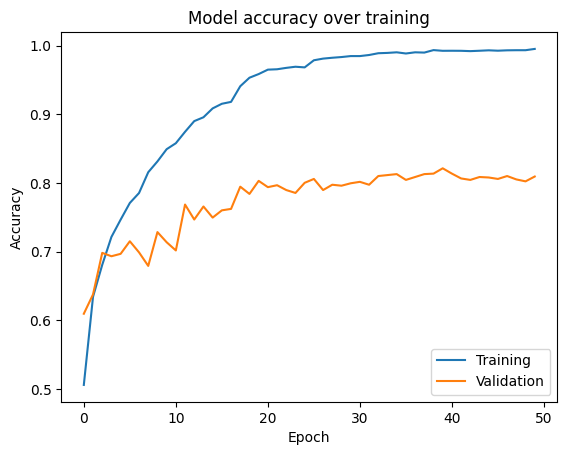

In [66]:
#Plot training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy over training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'lower right')
plt.show()

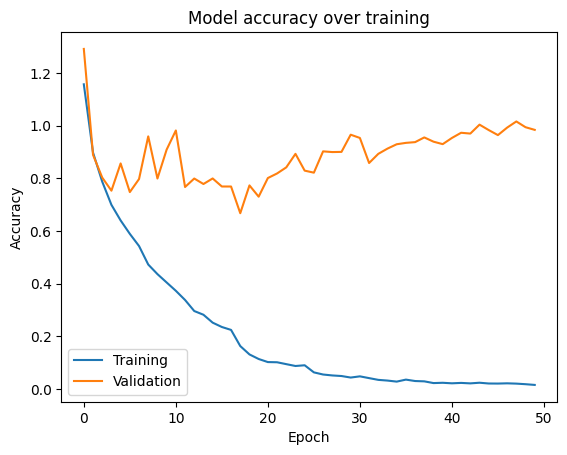

In [67]:
#Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy over training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'lower left')
plt.show()

In [57]:
#Evaluate model with test dataset
loss_test, accuracy_test = final_model.evaluate(x_test, y_test, verbose = 1)

32/32 [==============================] - 1s 41ms/step - loss: 1.0194 - accuracy: 0.8000


In [60]:
print('loss: ' + str(loss_test) + ' accuracy_test: ' + str(accuracy_test))

loss: 1.019443154335022 accuracy_test: 0.800000011920929


In [58]:
#Calculate model predictions for test dataset
y_pred = final_model.predict(x_test)

32/32 [==============================] - 1s 19ms/step


In [61]:
#Convert class predictions
y_pred_conv = np.argmax(y_pred, axis = 1)

In [62]:
#convert real test classes
y_test_conv = np.argmax(y_test, axis = 1)

In [69]:
print(confusion_matrix(y_test_conv, y_pred_conv))

[[223   9  13   5]
 [ 13 175  28  34]
 [  4  13 195  38]
 [  9  12  22 207]]


In [71]:
print(classification_report(y_test_conv, y_pred_conv))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       250
           1       0.84      0.70      0.76       250
           2       0.76      0.78      0.77       250
           3       0.73      0.83      0.78       250

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



In [72]:
#Save model
final_model.save('Models/Model_V1.h5')